In [2]:
from google.colab import files
uploaded = files.upload()


Saving data.zip to data.zip


In [3]:
import zipfile
import os

In [10]:
with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall("/content/")
!ls /content/

Chicken-fecal-images  data.zip	sample_data


In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [15]:
convolution_base = VGG16(
    weights= "imagenet",
    include_top = False,
    input_shape = (150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
convolution_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model = Sequential()

model.add(convolution_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
convolution_base.trainable = False

In [26]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/Chicken-fecal-images',
    validation_split=0.2,
    subset="training",        # <-- load the 80%
    seed=123,
    image_size=(150, 150),
    batch_size=32
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/Chicken-fecal-images',
    validation_split=0.2,
    subset="validation",      # <-- load the 20%
    seed=123,
    image_size=(150, 150),
    batch_size=32
)


Found 390 files belonging to 2 classes.
Using 312 files for training.
Found 390 files belonging to 2 classes.
Using 78 files for validation.


In [27]:
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [28]:
model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics= ['accuracy'])


In [30]:
history = model.fit(train_ds , epochs =10, validation_data = validation_ds)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 92s 9s/step - accuracy: 0.7264 - loss: 0.5787 - val_accuracy: 0.8718 - val_loss: 0.3852
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 88s 9s/step - accuracy: 0.9398 - loss: 0.1609 - val_accuracy: 0.8974 - val_loss: 0.2321
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 87s 9s/step - accuracy: 0.9763 - loss: 0.0393 - val_accuracy: 0.8974 - val_loss: 0.2895
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 146s 9s/step - accuracy: 0.9783 - loss: 0.0446 - val_accuracy: 0.9103 - val_loss: 0.2319
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 87s 9s/step - accuracy: 0.9966 - loss: 0.0193 - val_accuracy: 0.8846 - val_loss: 0.2633
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 90s 9s/step - accuracy: 0.9987 - loss: 0.0125 - val_accuracy: 0.8974 - val_loss: 0.2391
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 87s 9s/step - accuracy: 1.0000 - loss: 0.0126 - val_accuracy: 0.9103 - val_loss: 0.2391
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 86s 9s/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 0.9103 - val_loss

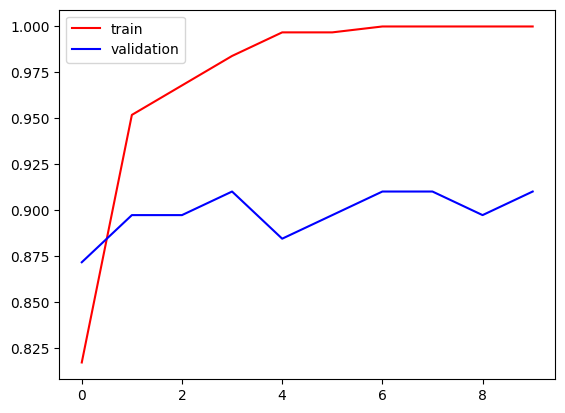

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

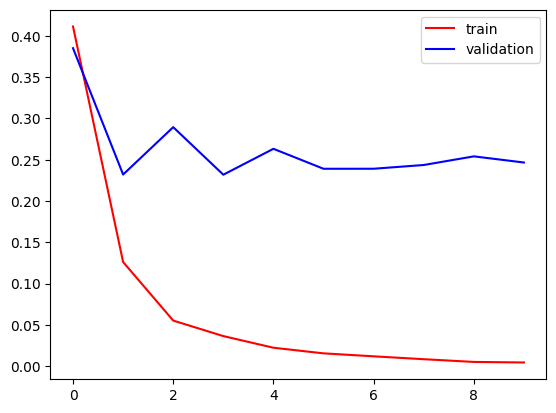

In [32]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()